In [2]:
#import All Required Librarys
import os
import numpy as np
import pandas as pd 
import random
import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16


In [5]:
#set path
IMAGESHAPE = [224, 224, 3] 
training_data = r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\test'
testing_data = r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train'

In [6]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

In [7]:
for each_layer in vgg_model.layers:
    each_layer.trainable = False

In [8]:
classes = glob(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train\*') 

In [9]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)

In [10]:
final_model = Model(inputs=vgg_model.input, outputs=prediction) 
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
final_model.compile( 
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train', 
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 5232 images belonging to 2 classes.


In [14]:
test_set = testing_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\test',
                                               target_size = (224, 224),
                                               batch_size = 4,
                                               class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
fitted_model = final_model.fit( 
 training_set,
 validation_data=test_set,
 epochs=5,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set)
)

Epoch 1/5
1308/1308 [==============================] - 1419s 1s/step - loss: 0.2711 - accuracy: 0.9192 - val_loss: 0.3468 - val_accuracy: 0.9199
Epoch 2/5
1308/1308 [==============================] - 1618s 1s/step - loss: 0.2660 - accuracy: 0.9442 - val_loss: 0.5987 - val_accuracy: 0.9151
Epoch 3/5
1308/1308 [==============================] - 1399s 1s/step - loss: 0.2203 - accuracy: 0.9520 - val_loss: 0.4862 - val_accuracy: 0.9279
Epoch 4/5
1308/1308 [==============================] - 1714s 1s/step - loss: 0.2164 - accuracy: 0.9585 - val_loss: 0.5604 - val_accuracy: 0.9167
Epoch 5/5
1308/1308 [==============================] - 1578s 1s/step - loss: 0.2038 - accuracy: 0.9568 - val_loss: 1.0951 - val_accuracy: 0.8846


In [15]:
plt.plot(fitted_model.history['loss'], label='training loss') #Plotting the accuracies
plt.plot(fitted_model.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(fitted_model.history['acc'], label='training accuracy')
plt.plot(fitted_model.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: name 'fitted_model' is not defined

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
val_loss, val_acc = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (val_acc, val_loss))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['acc'][-1])*100, 2)))


In [ ]:


label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')



In [15]:
#save Final model
final_model.save(r'C:\Users\Asus\our_model.h5')

In [ ]:
# Code for testing 

(250, 250)
<class 'PIL.Image.Image'>
None
RGB

 

1/1 [==============================] - 1s 505ms/step
Person is affected with Bronchitis.
Predictions: [[5.2367745e-20 1.0000000e+00]]


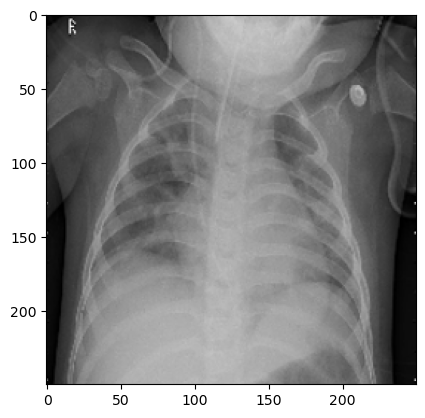

In [14]:
from keras_preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import cv2

model=load_model(r'C:\Users\Asus\our_model.h5') #Loading our model
img=image.load_img(r"C:\Users\Asus\Desktop\Bronchitis Project\Other Datasets\chest_xray\train\PNEUMONIA\person9_bacteria_41.jpeg",target_size=(224,224))

# change image size
xray= img.resize([250, 250])
print(xray.size)
# find more about the image
print(type(xray))
print(xray.format)
print(xray.mode)
# show the image
plt.imshow(xray)
print("\n \n")



imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)
if prediction[0][0]>prediction[0][1]:  #Printing the prediction of model.
    print('Person is safe.')
else:
    print('Person is affected with Bronchitis.')
print(f'Predictions: {prediction}')

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
val_loss, val_accuracy = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (val_accuracy, val_loss))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['acc'][-1])*100, 2)))

In [ ]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')
